<h3>Automation Template<h3>

In [2]:
# Reloading
%load_ext autoreload
%autoreload 2

In [3]:
# Imports Section
import re
import sys
import time
import pyvisa
import logging
import numpy as np
import matplotlib.pyplot as plt
from lib.oscilloscope import Oscilloscope
from lib.signal_generator import SignalGenerator

# Set up logging
logging.getLogger('pyvisa').setLevel(logging.WARNING)

# Set up VISA addresses
osc_address = 'USB0::0x1AB1::0x04CE::DS1ZA232605402::INSTR'
sg_address = 'USB0::0x1AB1::0x0642::DG1ZA232402828::INSTR'

# Create an instance of the Oscilloscope class
osc = Oscilloscope(osc_address)
sg = SignalGenerator(sg_address)

# Query Identities
print("Oscilloscope ID:", osc.idn())
print("Signal Generator ID:", sg.idn())

Oscilloscope ID: RIGOL TECHNOLOGIES,DS1054Z,DS1ZA232605402,00.04.05.SP1
Signal Generator ID: Rigol Technologies,DG1022Z,DG1ZA232402828,03.01.12  


<h4>Signal Generator<h4>

In [26]:
# Enable the output
sg.enable_output(1)

# Check output state 
print(f"Output state after disabling: {sg.query_output_state()}")

# Set waveform: sine wave, 1 kHz, 5 Vpp, 0 V offset
sg.set_waveform("SIN", frequency=500, amplitude=1, offset=0)

# Let the signal generator run
time.sleep(1)

# Disable the output
# sg.disable_output(1)

# Check output state 
print(f"Output state after disabling: {sg.query_output_state()}")

Output state after disabling: ON
Output state after disabling: ON


<h4>Oscilloscope<h4>

In [12]:
# Reset the oscilloscope
# osc.reset()

# Set timebase to 1 ms/div
osc.set_timebase(10e-3)

# Set channel 1 vertical scale to 20 mV/div
osc.set_channel_scale(1,3)

# Wait for command to complete
time.sleep(0.1)

# Set trigger level to 100 mV on channel 1
osc.set_trigger_source(1)
osc.set_trigger_level(0)

# Set acquisition mode to SINGLE
osc.set_acquisition_mode('SINGLE')

# Trigger a single acquisition
osc.trigger_single()

header_info = osc.get_header
print("Header Info:", header_info)


Header Info: <bound method Oscilloscope.get_header of <oscilloscope.Oscilloscope object at 0x000002BD26DF1D10>>


In [27]:
# Wait for acquisition to complete
time.sleep(0.1)

# Get waveform data from channel 1
osc.run()
time.sleep(1) # This should give enough time for the oscilloscope to load the window, so it should be based on the time base
# The time base should be such that it allows for at least 10 cycles of the main wave

data_osc = osc.get_waveform_data(1)
print(len(data_osc))
print(data_osc)

1200
[-0.1200123, 2.879987, 2.759987, 4.679985, 4.559985, 4.919985, 4.679985, 2.879987, 2.999987, -1.229346e-05, 0.1199877, -2.880012, -3.000011, -4.92001, -4.68001, -5.160009, -4.92001, -3.000011, -3.000011, -0.1200123, -0.1200123, 2.879987, 2.759987, 4.679985, 4.559985, 4.919985, 4.679985, 2.879987, 2.999987, -1.229346e-05, -1.229346e-05, -2.880012, -2.880012, -4.80001, -4.68001, -5.160009, -4.92001, -3.000011, -3.120011, -0.1200123, -0.1200123, 2.759987, 2.759987, 4.679985, 4.559985, 4.919985, 4.679985, 2.879987, 2.879987, -1.229346e-05, 0.1199877, -2.880012, -2.880012, -4.80001, -4.68001, -5.160009, -4.80001, -3.000011, -3.000011, -0.1200123, -0.1200123, 2.879987, 2.759987, 4.679985, 4.559985, 4.919985, 4.679985, 2.879987, 2.999987, -1.229346e-05, -1.229346e-05, -2.880012, -2.880012, -4.80001, -4.68001, -5.160009, -4.92001, -3.000011, -3.000011, -0.1200123, -0.1200123, 2.879987, 2.759987, 4.679985, 4.559985, 4.919985, 4.679985, 2.879987, 2.879987, -1.229346e-05, 0.1199877, -2.88001

<h4>Plotting<h4>

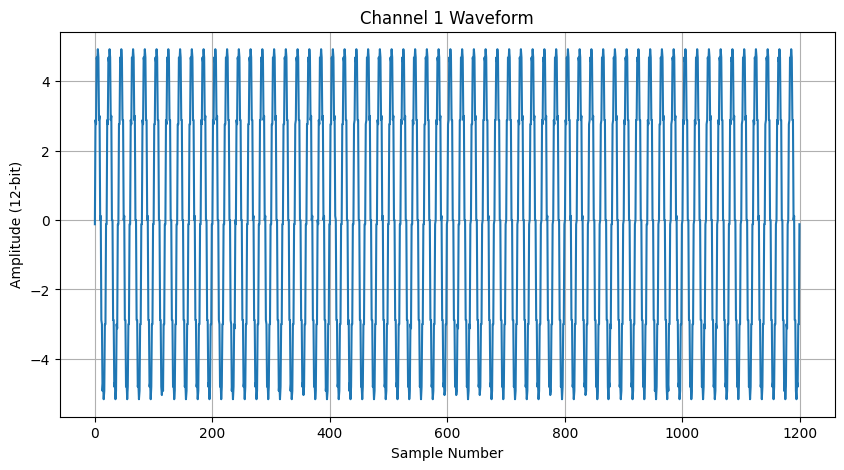

In [28]:
# Step 5: Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data_osc)
plt.title('Channel 1 Waveform')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude (12-bit)')
plt.grid()
plt.show()

In [4]:
# Close the connections
osc.close()
sg.close()